In [1]:
include("jl/init_default.jl");

In [2]:
include("jl/all.jl")

load_raw_halos1600 (generic function with 3 methods)

In [3]:
to_rho!(pos,m, rho);

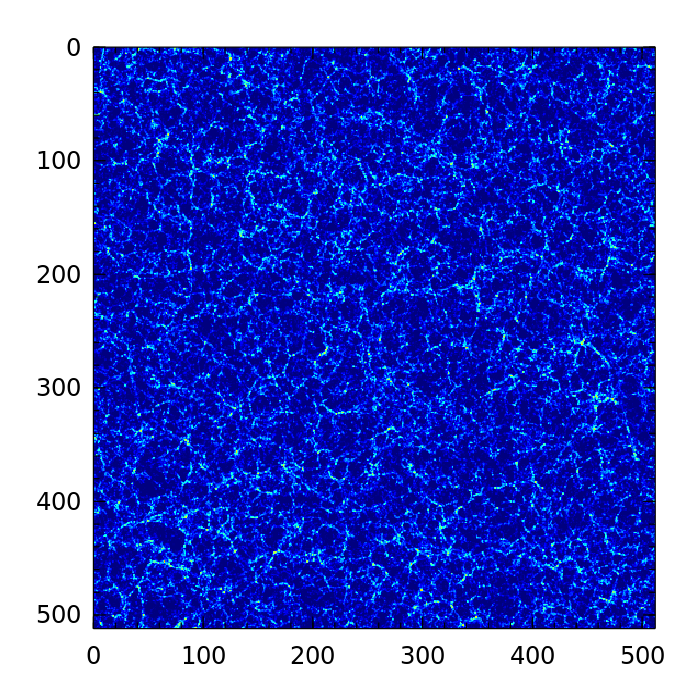

In [4]:
imrho = real(rho[:,:,328]) + real(rho[:,:,329]) + real(rho[:,:,330])
Winston.set_default_plot_size(700,700)
imagesc(log10(1e-8+imrho))

In [5]:
to_delta!(rho);

In [6]:
to_g_fft!(rho);
in_place_multiply!(rho, -1.0/4π);

In [7]:
@time from_cic_dim2!(c,pos,rho,1);

  7.390128 seconds (151.59 k allocations: 574.847 MB, 0.08% gc time)


In [8]:
_lvx = -D(1.0)*F(1.0)*Ha(1.0)*real(c);

In [9]:
std(_lvx)

424.23135f0

In [10]:
@time to_tlpt_delta!(rho);

 37.996244 seconds (353.61 k allocations: 1.015 GB, 0.13% gc time)


In [ ]:
to_g_fft!(rho);
in_place_multiply!(rho, -1.0/4π);

In [ ]:
@time from_cic_dim2!(c,pos,rho,1);

In [ ]:
_lvx2 = D2(1.0)*F2(1.0)*Ha(1.0)*real(c);

In [ ]:
std(_lvx2)

In [ ]:
kd = get_kd(pos);

In [ ]:
get_slope_std_smoothed(_lvx-_lvx2/4, vx, pos, 10000.0, 100000)

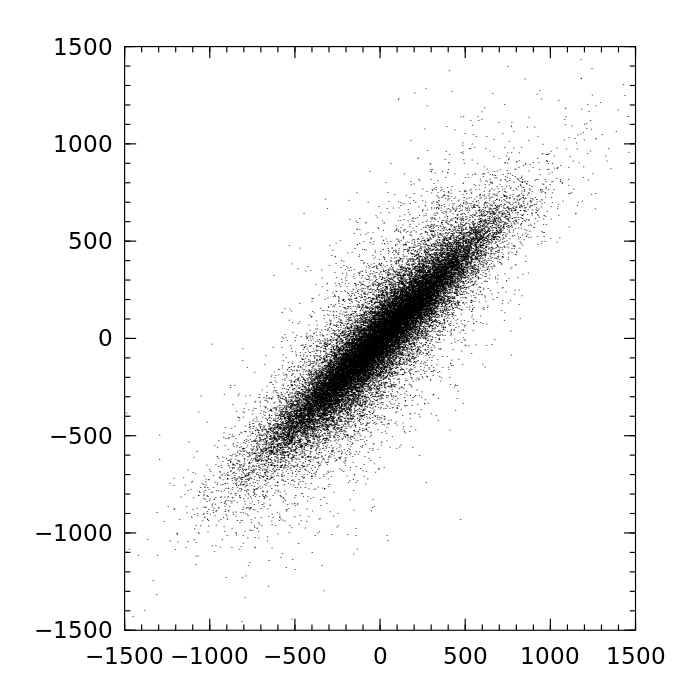

In [23]:
scatter((_lvx-_lvx2/3)[1:100:end], vx[1:100:end],0.00001)
xlim(-1500,1500)
ylim(-1500,1500)